# Исследование объявлений о продаже квартир

В моём распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Мои задачи: 

1. Изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

2. Изучить, как быстро продавались квартиры. Понять, сколько времени обычно занимает продажа, какие продажи можно считать быстрыми, а какие — необычно долгими?


3. Определить, какие факторы больше всего влияют на общую (полную) стоимость объекта.


4. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.


5. Описать, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга, а также посчитать стоимость каждого километра.

#### На основе проделанного анализа мной будет описан результат исследования и сделан общий вывод.

## Изучение общей информации о файле

Прочтем файл и изучим данные, чтобы посомтреть на структуру датасета, а также провести первый, "беглый" осмотр

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # Для игнорирования предупреждения при использовании 'set_xticklabels'

In [159]:
data = pd.read_csv('C:\\Users\\Skinnyman\\Pictures\\datasets\\real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [160]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21602,4,12054000.0,78.15,2016-03-13T00:00:00,3,2.84,9.0,46.50,6,False,...,14.85,2.0,Санкт-Петербург,27370.0,6072.0,1.0,763.0,3.0,587.0,219.0
23113,19,8100000.0,93.00,2017-06-04T00:00:00,4,3.00,3.0,73.00,1,False,...,10.00,1.0,Санкт-Петербург,21115.0,5470.0,2.0,711.0,0.0,NaN,254.0
6512,20,2780000.0,41.00,2018-03-26T00:00:00,1,2.70,5.0,NaN,4,NaN,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,43.0
19540,8,420000000.0,900.00,2017-12-06T00:00:00,12,2.80,25.0,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14551,2,3100000.0,75.00,2017-03-22T00:00:00,3,2.65,9.0,47.60,1,NaN,...,10.20,NaN,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,376.0
15389,10,3800000.0,38.50,2017-08-01T00:00:00,1,NaN,12.0,19.90,9,False,...,9.90,2.0,Санкт-Петербург,38226.0,13123.0,1.0,434.0,1.0,631.0,223.0
21655,1,3000000.0,41.00,2017-03-20T00:00:00,1,NaN,5.0,20.00,2,NaN,...,8.50,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,371.0
7206,7,5289476.0,46.90,2018-07-18T00:00:00,1,3.15,4.0,16.47,2,True,...,14.46,1.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,278.0
20347,1,5850000.0,64.00,2017-04-27T00:00:00,2,2.80,4.0,45.00,4,NaN,...,11.00,1.0,Санкт-Петербург,19638.0,2588.0,1.0,401.0,3.0,300.0,97.0
12673,0,4650000.0,52.50,2017-12-19T00:00:00,2,NaN,10.0,NaN,4,NaN,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [162]:
display(data.describe())
data.info()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

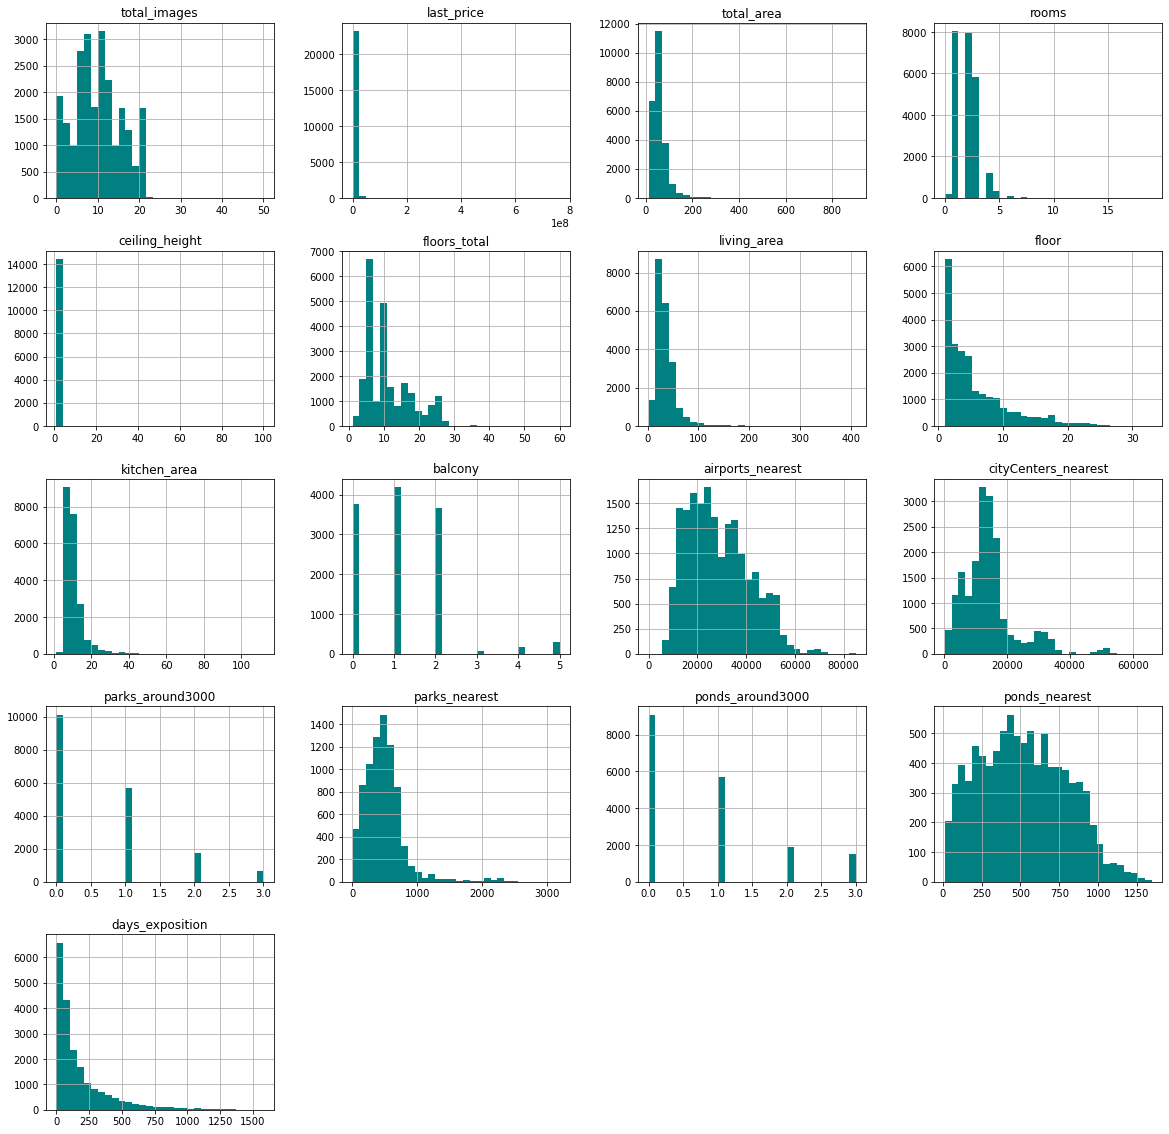

In [163]:
data.hist(bins=30, figsize=(20, 20), color='teal');

### Вывод

Уже после первого просмотра можно сделать вывод, что предстоит большая работа по предобработке. Из того, что очевидно уже сейчас:
- Некоторые столбцы следует переименовать
- Многие столбцы необходимо привести к другому типу данных. Так, столбец `is_apartment` должен состоять из булевых значений
- В датасете много столбцов с пропусками. Необходимо понять, чем их заполнить, и надо ли вообще

## Предобработка данных

Для начала переименуем столбцы и поменяем их местами, просто чтобы было удобнее работать

In [164]:
# Вызовем rename(), чтобы поменять названия некоторых столбцов, 
# после чего проверим, что всё удалось, с помощью info()

data = data.rename(columns={'studio': 'is_studio',
                            'airports_nearest': 'nearest_airport_dist',
                            'cityCenters_nearest': 'city_center_dist', 
                            'parks_around3000': 'parks_around_3km',
                            'parks_nearest': 'nearest_park_dist',
                            'ponds_around3000': 'ponds_around_3km',
                            'ponds_nearest': 'nearest_pond_dist',
                            'balcony': 'balconies',
                            'open_plan': 'is_open_plan'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  is_open_plan          23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balconies             12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  nearest_airport_dis

Логика порядка столбцов не совсем понятна, заменим на более очевидную

In [165]:
data = data[[
    'locality_name',
    'total_area',
    'rooms',
    'living_area',
    'kitchen_area',
    'ceiling_height',
    'balconies',
    'floor',
    'floors_total',
    'is_apartment',
    'is_studio',
    'is_open_plan',
    'last_price',
    'first_day_exposition',
    'days_exposition',
    'total_images',
    'city_center_dist',
    'nearest_airport_dist',
    'nearest_park_dist',
    'nearest_pond_dist',
    'parks_around_3km',
    'ponds_around_3km'
]]

data.head()

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,last_price,first_day_exposition,days_exposition,total_images,city_center_dist,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km
0,Санкт-Петербург,108.0,3,51.0,25.0,2.70,NaN,8,16.0,NaN,...,13000000.0,2019-03-07T00:00:00,NaN,20,16028.0,18863.0,482.0,755.0,1.0,2.0
1,посёлок Шушары,40.4,1,18.6,11.0,NaN,2.0,1,11.0,NaN,...,3350000.0,2018-12-04T00:00:00,81.0,7,18603.0,12817.0,NaN,NaN,0.0,0.0
2,Санкт-Петербург,56.0,2,34.3,8.3,NaN,0.0,4,5.0,NaN,...,5196000.0,2015-08-20T00:00:00,558.0,10,13933.0,21741.0,90.0,574.0,1.0,2.0
3,Санкт-Петербург,159.0,3,NaN,NaN,NaN,0.0,9,14.0,NaN,...,64900000.0,2015-07-24T00:00:00,424.0,0,6800.0,28098.0,84.0,234.0,2.0,3.0
4,Санкт-Петербург,100.0,2,32.0,41.0,3.03,NaN,13,14.0,NaN,...,10000000.0,2018-06-19T00:00:00,121.0,2,8098.0,31856.0,112.0,48.0,2.0,1.0


Теперь разберемся с пропусками. Для начала посмотрим, сколько их на наш датасет

In [166]:
data.isna().sum().sort_values()

is_studio                   0
total_area                  0
rooms                       0
total_images                0
first_day_exposition        0
last_price                  0
is_open_plan                0
floor                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
parks_around_3km         5518
ponds_around_3km         5518
city_center_dist         5519
nearest_airport_dist     5542
ceiling_height           9195
balconies               11519
nearest_pond_dist       14589
nearest_park_dist       15620
is_apartment            20924
dtype: int64

In [167]:
data.isna().mean()*100

locality_name            0.206760
total_area               0.000000
rooms                    0.000000
living_area              8.029875
kitchen_area             9.612220
ceiling_height          38.799105
balconies               48.605426
floor                    0.000000
floors_total             0.362885
is_apartment            88.290645
is_studio                0.000000
is_open_plan             0.000000
last_price               0.000000
first_day_exposition     0.000000
days_exposition         13.422507
total_images             0.000000
city_center_dist        23.287902
nearest_airport_dist    23.384953
nearest_park_dist       65.909954
nearest_pond_dist       61.559559
parks_around_3km        23.283683
ponds_around_3km        23.283683
dtype: float64

В некоторых колонках пропущенных значений довольно много. Посмотрим каждый столбец из тех, что понадобятся нам в анализе

In [168]:
# Пропуски в столбце `locality_name` отбрасываем сразу. Объявление, в котором
# не указан населенный пункт, не имеет ценности ни для аналитика, ни для клиента

data = data.dropna(subset=['locality_name'])
data.isna().sum().sort_values()

locality_name               0
total_images                0
first_day_exposition        0
last_price                  0
is_open_plan                0
floor                       0
is_studio                   0
rooms                       0
total_area                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around_3km         5510
ponds_around_3km         5510
city_center_dist         5511
nearest_airport_dist     5534
ceiling_height           9160
balconies               11513
nearest_pond_dist       14565
nearest_park_dist       15586
is_apartment            20890
dtype: int64

Пропуски в жилой площади заполним медианным значением по столбцу в зависимости от количества комнат. Для начала посмотрим на эти значения

In [169]:
data.groupby('rooms')['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.800
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

Отлично, теперь напишем цикл, с помощью которого заполним пропуски этими значениями

In [170]:
living_med = data.groupby('rooms')['living_area'].median()

for rooms_number in living_med.index:
    data.loc[(data['rooms'] == rooms_number), 'living_area'] = data.loc[(data['rooms'] == rooms_number), 'living_area'].fillna(living_med[rooms_number])

data.head()

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,last_price,first_day_exposition,days_exposition,total_images,city_center_dist,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km
0,Санкт-Петербург,108.0,3,51.0,25.0,2.70,NaN,8,16.0,NaN,...,13000000.0,2019-03-07T00:00:00,NaN,20,16028.0,18863.0,482.0,755.0,1.0,2.0
1,посёлок Шушары,40.4,1,18.6,11.0,NaN,2.0,1,11.0,NaN,...,3350000.0,2018-12-04T00:00:00,81.0,7,18603.0,12817.0,NaN,NaN,0.0,0.0
2,Санкт-Петербург,56.0,2,34.3,8.3,NaN,0.0,4,5.0,NaN,...,5196000.0,2015-08-20T00:00:00,558.0,10,13933.0,21741.0,90.0,574.0,1.0,2.0
3,Санкт-Петербург,159.0,3,45.0,NaN,NaN,0.0,9,14.0,NaN,...,64900000.0,2015-07-24T00:00:00,424.0,0,6800.0,28098.0,84.0,234.0,2.0,3.0
4,Санкт-Петербург,100.0,2,32.0,41.0,3.03,NaN,13,14.0,NaN,...,10000000.0,2018-06-19T00:00:00,121.0,2,8098.0,31856.0,112.0,48.0,2.0,1.0


In [171]:
data.isna().sum().sort_values()

locality_name               0
total_images                0
first_day_exposition        0
last_price                  0
is_open_plan                0
floor                       0
is_studio                   0
living_area                 0
rooms                       0
total_area                  0
floors_total               85
kitchen_area             2269
days_exposition          3180
parks_around_3km         5510
ponds_around_3km         5510
city_center_dist         5511
nearest_airport_dist     5534
ceiling_height           9160
balconies               11513
nearest_pond_dist       14565
nearest_park_dist       15586
is_apartment            20890
dtype: int64

In [172]:
# Посчитаем, сколько всего уникальных населенных пунктов есть в датафрейме

len(data['locality_name'].unique())

364

In [173]:
# Посмотрим на этот список, чтобы попытаться выявить неявные дубли

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Не нашел возможности проверить этот список на наличие неявных дубликатов, за одним исключением: е и ё в слове "посёлок". Уберем их, и посмотрим, сколько дубликатов удастся убрать

In [174]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [175]:
# Удалось избавиться от 34 дубликатов. Остальное трогать не будем, т.к. у меня нет уверенности, что это дубли

len(data['locality_name'].unique())

330

In [176]:
# Проверим булевы столбцы is_studio, is_open_plan и is_apartment

display(data['is_studio'].unique())
display(data['is_open_plan'].unique())
display(data['is_apartment'].unique())

array([False,  True])

array([False,  True])

array([nan, False, True], dtype=object)

Логично предположить, что если значение в столбце 'is_apartment' пропущено, значит это не апартаменты. Заменим на False

In [177]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [178]:
# По аналогии проверим столбец 'balconies'

data['balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [179]:
# Заменим пропуски на 0, и переведем данные столбца в int

data['balconies'] = data['balconies'].fillna(0).astype(int)

Отлично, теперь разберемся со столбцом `first_day_exposition`. Переведем в нужный формат, чтобы потом добавить столбцы с днем недели, месяцем и годом публикации

In [180]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [181]:
data.head()

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,last_price,first_day_exposition,days_exposition,total_images,city_center_dist,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km
0,Санкт-Петербург,108.0,3,51.0,25.0,2.70,0,8,16.0,False,...,13000000.0,2019-03-07,NaN,20,16028.0,18863.0,482.0,755.0,1.0,2.0
1,поселок Шушары,40.4,1,18.6,11.0,NaN,2,1,11.0,False,...,3350000.0,2018-12-04,81.0,7,18603.0,12817.0,NaN,NaN,0.0,0.0
2,Санкт-Петербург,56.0,2,34.3,8.3,NaN,0,4,5.0,False,...,5196000.0,2015-08-20,558.0,10,13933.0,21741.0,90.0,574.0,1.0,2.0
3,Санкт-Петербург,159.0,3,45.0,NaN,NaN,0,9,14.0,False,...,64900000.0,2015-07-24,424.0,0,6800.0,28098.0,84.0,234.0,2.0,3.0
4,Санкт-Петербург,100.0,2,32.0,41.0,3.03,0,13,14.0,False,...,10000000.0,2018-06-19,121.0,2,8098.0,31856.0,112.0,48.0,2.0,1.0


### Рассчет и добавление в таблицу новых столбцов

Исходя из задания, добавим с наш датасет несколько новых столбцов

In [182]:
# И начнём с дня недели, месяца и года публикации объявления

data['day_of_the_week_exp'] = data['first_day_exposition'].dt.day_name()
data['month_exp'] = data['first_day_exposition'].dt.month_name()
data['year_exp'] = data['first_day_exposition'].dt.year

In [183]:
data.head()

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,total_images,city_center_dist,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km,day_of_the_week_exp,month_exp,year_exp
0,Санкт-Петербург,108.0,3,51.0,25.0,2.70,0,8,16.0,False,...,20,16028.0,18863.0,482.0,755.0,1.0,2.0,Thursday,March,2019
1,поселок Шушары,40.4,1,18.6,11.0,NaN,2,1,11.0,False,...,7,18603.0,12817.0,NaN,NaN,0.0,0.0,Tuesday,December,2018
2,Санкт-Петербург,56.0,2,34.3,8.3,NaN,0,4,5.0,False,...,10,13933.0,21741.0,90.0,574.0,1.0,2.0,Thursday,August,2015
3,Санкт-Петербург,159.0,3,45.0,NaN,NaN,0,9,14.0,False,...,0,6800.0,28098.0,84.0,234.0,2.0,3.0,Friday,July,2015
4,Санкт-Петербург,100.0,2,32.0,41.0,3.03,0,13,14.0,False,...,2,8098.0,31856.0,112.0,48.0,2.0,1.0,Tuesday,June,2018


Всё получилось, теперь добавим столбец с типом этажа

In [184]:
# Напишем функцию, которая "побьёт" этажи на три типа: первый, последний и другой

def floor_sep(data):
    if data['floor'] == 1:
        return 'Первый'
    elif data['floor'] == data['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

Применим написанную функцию и добавим столбец `floor_type` в датасет

In [185]:
data['floor_type'] = data.apply(floor_sep, axis=1)

# Проверка, что функция отработала как надо
# display(data[data['floor_type'] == 'Первый'])
# display(data[data['floor_type'] == 'Последний'])

In [186]:
# Продолжаем добавлять необходимые данные. На очереди - цена квадратного метра

data['price_per_m2'] = data['last_price'] / data['total_area']
data.head(10)

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km,day_of_the_week_exp,month_exp,year_exp,floor_type,price_per_m2
0,Санкт-Петербург,108.00,3,51.00,25.00,2.70,0,8,16.0,False,...,18863.0,482.0,755.0,1.0,2.0,Thursday,March,2019,Другой,120370.370370
1,поселок Шушары,40.40,1,18.60,11.00,NaN,2,1,11.0,False,...,12817.0,NaN,NaN,0.0,0.0,Tuesday,December,2018,Первый,82920.792079
2,Санкт-Петербург,56.00,2,34.30,8.30,NaN,0,4,5.0,False,...,21741.0,90.0,574.0,1.0,2.0,Thursday,August,2015,Другой,92785.714286
3,Санкт-Петербург,159.00,3,45.00,NaN,NaN,0,9,14.0,False,...,28098.0,84.0,234.0,2.0,3.0,Friday,July,2015,Другой,408176.100629
4,Санкт-Петербург,100.00,2,32.00,41.00,3.03,0,13,14.0,False,...,31856.0,112.0,48.0,2.0,1.0,Tuesday,June,2018,Другой,100000.000000
5,городской поселок Янино-1,30.40,1,14.40,9.10,NaN,0,5,12.0,False,...,NaN,NaN,NaN,NaN,NaN,Monday,September,2018,Другой,95065.789474
6,поселок Парголово,37.30,1,10.60,14.40,NaN,1,6,26.0,False,...,52996.0,NaN,NaN,0.0,0.0,Thursday,November,2017,Другой,99195.710456
7,Санкт-Петербург,71.60,2,30.50,18.90,NaN,2,22,24.0,False,...,23982.0,NaN,NaN,0.0,0.0,Thursday,April,2019,Другой,110544.692737
8,поселок Мурино,33.16,1,15.43,8.81,NaN,0,26,27.0,False,...,NaN,NaN,NaN,NaN,NaN,Wednesday,May,2018,Другой,87454.764777
9,Санкт-Петербург,61.00,3,43.60,6.50,2.50,2,7,9.0,False,...,50898.0,NaN,NaN,0.0,0.0,Sunday,February,2017,Другой,88524.590164


In [187]:
# Посчитано корректно, но выглядит некрасиво. Округлим до двух знаков после запятой

data['price_per_m2'] = data['price_per_m2'].round(2)
data.head(10)

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km,day_of_the_week_exp,month_exp,year_exp,floor_type,price_per_m2
0,Санкт-Петербург,108.00,3,51.00,25.00,2.70,0,8,16.0,False,...,18863.0,482.0,755.0,1.0,2.0,Thursday,March,2019,Другой,120370.37
1,поселок Шушары,40.40,1,18.60,11.00,NaN,2,1,11.0,False,...,12817.0,NaN,NaN,0.0,0.0,Tuesday,December,2018,Первый,82920.79
2,Санкт-Петербург,56.00,2,34.30,8.30,NaN,0,4,5.0,False,...,21741.0,90.0,574.0,1.0,2.0,Thursday,August,2015,Другой,92785.71
3,Санкт-Петербург,159.00,3,45.00,NaN,NaN,0,9,14.0,False,...,28098.0,84.0,234.0,2.0,3.0,Friday,July,2015,Другой,408176.10
4,Санкт-Петербург,100.00,2,32.00,41.00,3.03,0,13,14.0,False,...,31856.0,112.0,48.0,2.0,1.0,Tuesday,June,2018,Другой,100000.00
5,городской поселок Янино-1,30.40,1,14.40,9.10,NaN,0,5,12.0,False,...,NaN,NaN,NaN,NaN,NaN,Monday,September,2018,Другой,95065.79
6,поселок Парголово,37.30,1,10.60,14.40,NaN,1,6,26.0,False,...,52996.0,NaN,NaN,0.0,0.0,Thursday,November,2017,Другой,99195.71
7,Санкт-Петербург,71.60,2,30.50,18.90,NaN,2,22,24.0,False,...,23982.0,NaN,NaN,0.0,0.0,Thursday,April,2019,Другой,110544.69
8,поселок Мурино,33.16,1,15.43,8.81,NaN,0,26,27.0,False,...,NaN,NaN,NaN,NaN,NaN,Wednesday,May,2018,Другой,87454.76
9,Санкт-Петербург,61.00,3,43.60,6.50,2.50,2,7,9.0,False,...,50898.0,NaN,NaN,0.0,0.0,Sunday,February,2017,Другой,88524.59


In [188]:
data['city_center_dist_km'] = data['city_center_dist'] / 1000
data.head(10)

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km,day_of_the_week_exp,month_exp,year_exp,floor_type,price_per_m2,city_center_dist_km
0,Санкт-Петербург,108.00,3,51.00,25.00,2.70,0,8,16.0,False,...,482.0,755.0,1.0,2.0,Thursday,March,2019,Другой,120370.37,16.028
1,поселок Шушары,40.40,1,18.60,11.00,NaN,2,1,11.0,False,...,NaN,NaN,0.0,0.0,Tuesday,December,2018,Первый,82920.79,18.603
2,Санкт-Петербург,56.00,2,34.30,8.30,NaN,0,4,5.0,False,...,90.0,574.0,1.0,2.0,Thursday,August,2015,Другой,92785.71,13.933
3,Санкт-Петербург,159.00,3,45.00,NaN,NaN,0,9,14.0,False,...,84.0,234.0,2.0,3.0,Friday,July,2015,Другой,408176.10,6.800
4,Санкт-Петербург,100.00,2,32.00,41.00,3.03,0,13,14.0,False,...,112.0,48.0,2.0,1.0,Tuesday,June,2018,Другой,100000.00,8.098
5,городской поселок Янино-1,30.40,1,14.40,9.10,NaN,0,5,12.0,False,...,NaN,NaN,NaN,NaN,Monday,September,2018,Другой,95065.79,NaN
6,поселок Парголово,37.30,1,10.60,14.40,NaN,1,6,26.0,False,...,NaN,NaN,0.0,0.0,Thursday,November,2017,Другой,99195.71,19.143
7,Санкт-Петербург,71.60,2,30.50,18.90,NaN,2,22,24.0,False,...,NaN,NaN,0.0,0.0,Thursday,April,2019,Другой,110544.69,11.634
8,поселок Мурино,33.16,1,15.43,8.81,NaN,0,26,27.0,False,...,NaN,NaN,NaN,NaN,Wednesday,May,2018,Другой,87454.76,NaN
9,Санкт-Петербург,61.00,3,43.60,6.50,2.50,2,7,9.0,False,...,NaN,NaN,0.0,0.0,Sunday,February,2017,Другой,88524.59,15.008


In [189]:
data = data.replace(pd.NA, np.nan).round({"city_center_dist_km": 1})
data.head(10)

,locality_name,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,is_apartment,...,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km,day_of_the_week_exp,month_exp,year_exp,floor_type,price_per_m2,city_center_dist_km
0,Санкт-Петербург,108.00,3,51.00,25.00,2.70,0,8,16.0,False,...,482.0,755.0,1.0,2.0,Thursday,March,2019,Другой,120370.37,16.0
1,поселок Шушары,40.40,1,18.60,11.00,NaN,2,1,11.0,False,...,NaN,NaN,0.0,0.0,Tuesday,December,2018,Первый,82920.79,18.6
2,Санкт-Петербург,56.00,2,34.30,8.30,NaN,0,4,5.0,False,...,90.0,574.0,1.0,2.0,Thursday,August,2015,Другой,92785.71,13.9
3,Санкт-Петербург,159.00,3,45.00,NaN,NaN,0,9,14.0,False,...,84.0,234.0,2.0,3.0,Friday,July,2015,Другой,408176.10,6.8
4,Санкт-Петербург,100.00,2,32.00,41.00,3.03,0,13,14.0,False,...,112.0,48.0,2.0,1.0,Tuesday,June,2018,Другой,100000.00,8.1
5,городской поселок Янино-1,30.40,1,14.40,9.10,NaN,0,5,12.0,False,...,NaN,NaN,NaN,NaN,Monday,September,2018,Другой,95065.79,NaN
6,поселок Парголово,37.30,1,10.60,14.40,NaN,1,6,26.0,False,...,NaN,NaN,0.0,0.0,Thursday,November,2017,Другой,99195.71,19.1
7,Санкт-Петербург,71.60,2,30.50,18.90,NaN,2,22,24.0,False,...,NaN,NaN,0.0,0.0,Thursday,April,2019,Другой,110544.69,11.6
8,поселок Мурино,33.16,1,15.43,8.81,NaN,0,26,27.0,False,...,NaN,NaN,NaN,NaN,Wednesday,May,2018,Другой,87454.76,NaN
9,Санкт-Петербург,61.00,3,43.60,6.50,2.50,2,7,9.0,False,...,NaN,NaN,0.0,0.0,Sunday,February,2017,Другой,88524.59,15.0


In [190]:
np.round(data['city_center_dist_km']).astype('Int32')

0          16
1          19
2          14
3           7
4           8
         ... 
23694       4
23695    <NA>
23696    <NA>
23697      10
23698    <NA>
Name: city_center_dist_km, Length: 23650, dtype: Int32

Переформатируем столбец `last_price`, переведём значения из руб. в млн руб. Для этого значения в колонке last_price разделим на 1 000 000. Как будет видно в дальнейшем, это упростит понимание гистограмм, построенных на основе этого столбца

In [191]:
data['last_price'] = data['last_price'] / 1000000
data = data.rename(columns={'last_price': 'last_price_m_rub'})

In [192]:
# Последним шагом снова поменяем некоторые столбцы местами, просто потому что можем

data = data[[
    'locality_name',
    'total_area',
    'rooms',
    'living_area',
    'kitchen_area',
    'ceiling_height',
    'balconies',
    'floor',
    'floor_type',
    'floors_total',
    'is_apartment',
    'is_studio',
    'is_open_plan',
    'last_price_m_rub',
    'price_per_m2',
    'first_day_exposition',
    'day_of_the_week_exp',
    'month_exp',
    'year_exp',
    'days_exposition',
    'total_images',
    'city_center_dist',
    'city_center_dist_km',
    'nearest_airport_dist',
    'nearest_park_dist',
    'nearest_pond_dist',
    'parks_around_3km',
    'ponds_around_3km'
]]

## Исследовательский анализ данных

Изучим следующие параметры, основываясь на задании:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для начала избавимся от аномальных значений, далее построим нужные графики

In [193]:
# Используем метод describe ещё раз, чтобы посмотреть на интересующие нас столбцы

data.describe()

,total_area,rooms,living_area,kitchen_area,ceiling_height,balconies,floor,floors_total,last_price_m_rub,price_per_m2,year_exp,days_exposition,total_images,city_center_dist,city_center_dist_km,nearest_airport_dist,nearest_park_dist,nearest_pond_dist,parks_around_3km,ponds_around_3km
count,23650.000000,23650.000000,23650.000000,21381.000000,14490.000000,23650.000000,23650.000000,23565.000000,23650.000000,2.365000e+04,23650.000000,20470.000000,23650.000000,18139.000000,18139.000000,18116.000000,8064.000000,9085.000000,18140.000000,18140.000000
mean,60.329069,2.070106,34.313891,10.566403,2.771287,0.591712,5.893277,10.675875,6.541127,9.943225e+04,2017.370021,180.753200,9.862326,14197.860742,14.197883,28803.225878,490.830729,518.059879,0.611577,0.769680
std,35.661808,1.078620,21.709506,5.901753,1.261593,0.959662,4.883317,6.594823,10.896399,5.033794e+04,1.037806,219.777916,5.682278,8606.830295,8.606480,12637.314144,342.554386,277.841733,0.802003,0.937948
min,12.000000,0.000000,2.000000,1.300000,1.000000,0.000000,1.000000,1.000000,0.012190,1.118300e+02,2014.000000,1.000000,0.000000,181.000000,0.200000,0.000000,1.000000,13.000000,0.000000,0.000000
25%,40.000000,1.000000,18.400000,7.000000,2.520000,0.000000,2.000000,5.000000,3.400000,7.661496e+04,2017.000000,45.000000,6.000000,9241.000000,9.200000,18575.750000,288.000000,293.000000,0.000000,0.000000
50%,52.000000,2.000000,30.300000,9.100000,2.650000,0.000000,4.000000,9.000000,4.650000,9.500000e+04,2017.000000,95.000000,9.000000,13105.000000,13.100000,26756.500000,454.500000,502.000000,0.000000,1.000000
75%,69.700000,3.000000,42.700000,12.000000,2.800000,1.000000,8.000000,16.000000,6.799000,1.142742e+05,2018.000000,231.000000,14.000000,16293.000000,16.300000,37294.000000,612.000000,730.000000,1.000000,1.000000
max,900.000000,19.000000,409.700000,112.000000,100.000000,5.000000,33.000000,60.000000,763.000000,1.907500e+06,2019.000000,1580.000000,50.000000,65968.000000,66.000000,84869.000000,3190.000000,1344.000000,3.000000,3.000000


Основываясь на этих данных, пропишем основные "точки роста"

- Данные по общей площади выглядят приемлемо. Я даже готов поверить в площадь в 900 кв. метров, но всё же отсечём значения выше 250;
- С ценами тоже всё хорошо, но я решил ограничить выборку квартирами, чья стоимость не превышает 40 млн рублей;
- Высота потолков в 1 метр и в 100 метров - мощно. Ограничим выборку 2.5 метрами снизу (потолки ниже противоречат нормам СанПиН, а потому для анализа не подходят) и 10 метрами сверху;
- Этажность ограничим 30-ю. В Питере и пригородах нет жилых зданий в 60 этажей, это искаженная информация;
- Расстояния до центра, парка и аэропорта оставим как есть, явных аномалий нет, а проверить эти данные на достоверность не представляется возможным;

Почистим данные от выбросов:

In [224]:
data = data[data['total_area'] <= 250]
data = data[data['last_price_m_rub'] <= 40000000]
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 10)]
data = data[data['floors_total'] <= 30]

Отлично, теперь перейдём к графикам:

count    14298.000000
mean        60.487858
std         29.780108
min         12.000000
25%         41.000000
50%         53.100000
75%         71.000000
max        250.000000
Name: total_area, dtype: float64

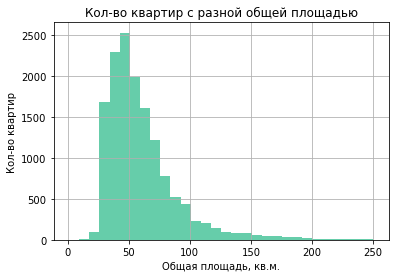

In [294]:
display(data['total_area'].describe())
data['total_area'].hist(bins=30, range=(1, 250), color='mediumaquamarine')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир с разной общей площадью');

К графику жилой площади не придраться, здесь всё выглядит так, как и ожидаешь

count    14298.000000
mean        34.887125
std         19.406075
min          2.000000
25%         19.000000
50%         30.500000
75%         43.400000
max        179.200000
Name: living_area, dtype: float64

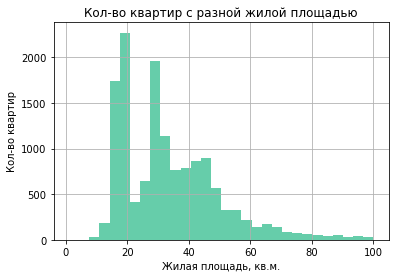

In [295]:
display(data['living_area'].describe())
data['living_area'].hist(bins=30, range=(1, 100), color='mediumaquamarine')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир с разной жилой площадью');

С жилой площадью всё не так гладко - 2 пика и "провал" между ними - не лучшая картина. Пока я не могу найти этому объективных причин, есть вероятность, что это как-то связано с типовыми застройками. Никогда не знаешь, чего ты не знаешь

count    13391.000000
mean        10.473221
std          5.717902
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

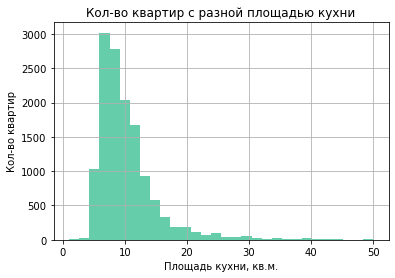

In [296]:
display(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=30, range=(1, 50), color='mediumaquamarine')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир с разной площадью кухни');

И ещё один график, на который любо-дорого смотреть. Пик площади кухни в диапозоне 5-10 метров. Всё, как в жизни :)

count    14298.000000
mean         6.505100
std          7.577192
min          0.012190
25%          3.571250
50%          4.850000
75%          7.000000
max        330.000000
Name: last_price_m_rub, dtype: float64

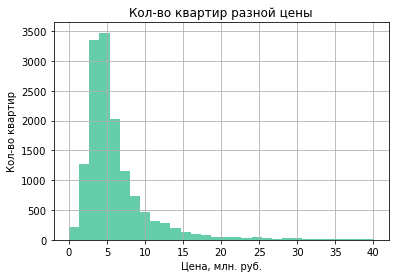

In [297]:
display(data['last_price_m_rub'].describe())
data['last_price_m_rub'].hist(bins=30, range=(0, 40), color='mediumaquamarine')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир разной цены');

Я правильно сделал, выбрав "отсечку" в 40 млн. Квартир дешевле - подавляющее большинство

count    14298.000000
mean         2.117219
std          1.045832
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

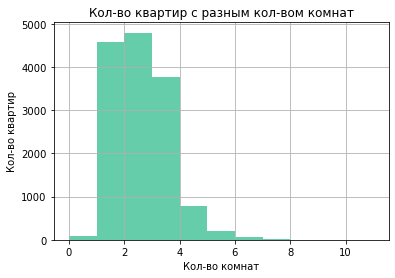

In [298]:
display(data['rooms'].describe())
data['rooms'].hist(bins=11, range=(0, 11), color='mediumaquamarine')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир с разным кол-вом комнат');

Логично предположить, что кваритры с 0 комнат - студии. В остальном всё выглядит хорошо, больше всего одно-, двух- и трёхкомнатных квартир, всё максимально логично и ожидаемо

count    14298.000000
mean         2.726120
std          0.284467
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

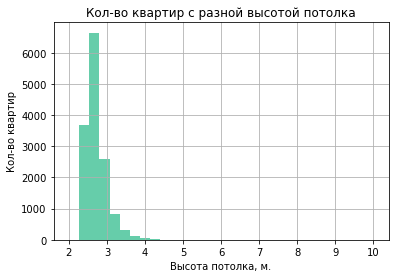

In [299]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=30, range=(2, 10), color='mediumaquamarine')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир с разной высотой потолка');

Снова кажется, что мы не зря убрали аномально высокие и низкие потолки - подавляющее большинство держится в районе 2.6 - 2.8 метров

count    14298.000000
mean         5.621695
std          4.601552
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         27.000000
Name: floor, dtype: float64

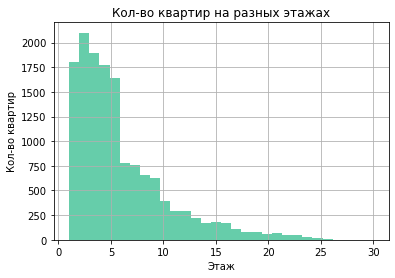

In [300]:
display(data['floor'].describe())
data['floor'].hist(bins=30, range=(1, 30), color='mediumaquamarine')
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир на разных этажах');

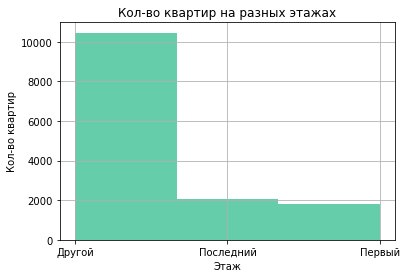

In [301]:
data['floor_type'].hist(bins=3, color='mediumaquamarine')
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир на разных этажах');

Как и ожидалось, меньше всего квартир на последних и первых этажах, причем первый этаж - самый непопулярный

count    14298.000000
mean        10.183382
std          6.146456
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         29.000000
Name: floors_total, dtype: float64

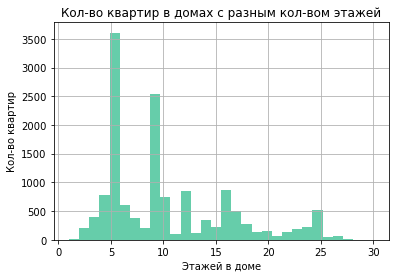

In [302]:
display(data['floors_total'].describe())
data['floors_total'].hist(bins=30, range=(1, 30), color='mediumaquamarine')
plt.xlabel('Этажей в доме')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир в домах с разным кол-вом этажей');

А здесь дело почти наверняка в типовой застройке. Пяти-, девяти- и двенадцатиэтажки в своё время были крайне популярны. Связано это было, насколько я знаю, с нормами на количество лифтов на подъезд.

count    11399.000000
mean     14108.862005
std       8754.353019
min        181.000000
25%       9162.500000
50%      12990.000000
75%      16042.500000
max      65968.000000
Name: city_center_dist, dtype: float64

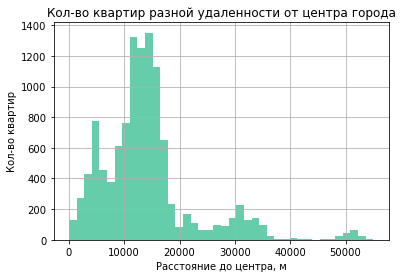

In [303]:
display(data['city_center_dist'].describe())
data['city_center_dist'].hist(bins=40, range=(0, 55000), color='mediumaquamarine')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир разной удаленности от центра города');

count    11381.000000
mean     28846.650382
std      12647.990019
min          0.000000
25%      18503.000000
50%      26784.000000
75%      37131.000000
max      84869.000000
Name: nearest_airport_dist, dtype: float64

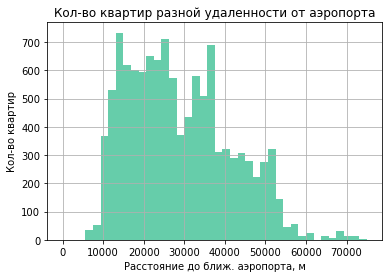

In [304]:
display(data['nearest_airport_dist'].describe())
data['nearest_airport_dist'].hist(bins=40, range=(0, 75000), color='mediumaquamarine')
plt.xlabel('Расстояние до ближ. аэропорта, м')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир разной удаленности от аэропорта');

count    5198.000000
mean      477.730473
std       321.499734
min         3.000000
25%       286.000000
50%       450.000000
75%       602.000000
max      3190.000000
Name: nearest_park_dist, dtype: float64

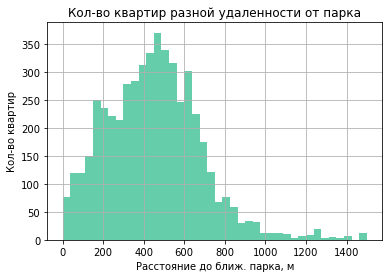

In [305]:
display(data['nearest_park_dist'].describe())
data['nearest_park_dist'].hist(bins=40, range=(0, 1500), color='mediumaquamarine')
plt.xlabel('Расстояние до ближ. парка, м')
plt.ylabel('Кол-во квартир')
plt.title('Кол-во квартир разной удаленности от парка');

К трем графикам выше не могу дать почти никаких комментариев, кроме того, что радостным выглядит пик в 400 с небольшим метров в графике `nearest_park_dist`

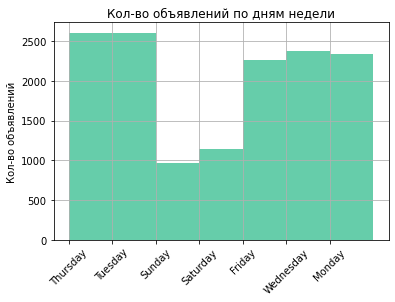

In [306]:
day_of_the_week_labels = ['Thursday', 'Tuesday', 'Sunday', 'Saturday', 'Friday', 'Wednesday', 'Monday']
data['day_of_the_week_exp'].hist(bins=7, range=(0, 7), color='mediumaquamarine').set_xticklabels(day_of_the_week_labels, rotation = 45)
plt.ylabel('Кол-во объявлений')
plt.title('Кол-во объявлений по дням недели');

Кажется, выставлять объявление о продаже квартиры в выходные - дурной тон. Может быть, в выходные их меньше смотрят. Также вероятно, в выходные не работают агенства, которые зачастую и занимаются продажей квартир

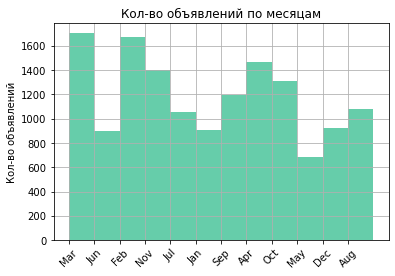

In [307]:
month_labels = ['Mar', 'Jun', 'Feb', 'Nov', 'Jul', 'Jan', 'Sep', 'Apr', 'Oct', 'May', 'Dec', 'Aug']
data['month_exp'].hist(bins=12, range=(0, 12), color='mediumaquamarine').set_xticklabels(month_labels, rotation = 45)
plt.ylabel('Кол-во объявлений')
plt.title('Кол-во объявлений по месяцам');

Как ни старался - не нашел закономерности в популярности месяцев. Как бы то ни было, судя по всему второй и третий месяц года являются самыми популярными

Отлично, теперь посмотрим, сколько в среднем "висит" объявление о продаже

In [308]:
data['days_exposition'].describe()

count    11883.000000
mean       189.796095
std        228.130977
min          1.000000
25%         45.000000
50%        103.000000
75%        246.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по этой информации, в среднем продажа квартиры занимает 3-4 месяца. Построим гистограмму, чтобы посмотреть более детально

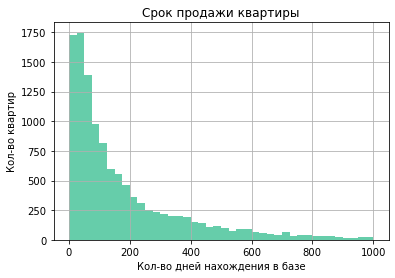

In [309]:
data['days_exposition'].hist(bins=40, range=(0, 1000), color='mediumaquamarine')
plt.xlabel('Кол-во дней нахождения в базе')
plt.ylabel('Кол-во квартир')
plt.title('Срок продажи квартиры');

Первые несколько месяцев явно являются ключевыми в продаже квартиры. В общем и целом, нормой можно считать срок до полутора лет, что вообще-то довольно много. Если не уложился в этот срок - скорее всего, ты что-то делаешь не так

Теперь посмотрим, зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира;
- даты размещения.

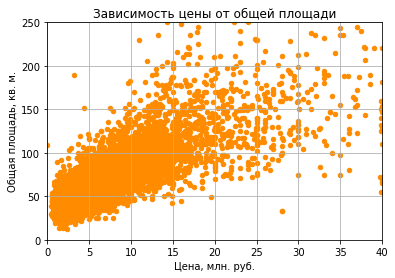

In [344]:
data.plot(x='last_price_m_rub', y='total_area', kind='scatter', ylim=(0, 250), xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Общая площадь, кв. м.')
plt.title('Зависимость цены от общей площади');

Можно наблюдать прямую зависимость цены от площади квартиры. Это логично, чем больше квартира - тем, как правило, выше ее стоимость при прочих равных

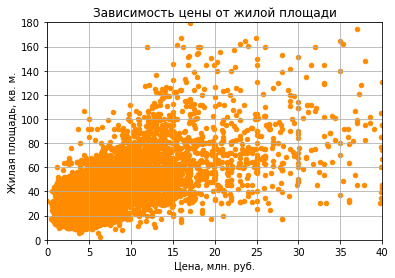

In [345]:
data.plot(x='last_price_m_rub', y='living_area', kind='scatter', ylim=(0, 180), xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Жилая площадь, кв. м.')
plt.title('Зависимость цены от жилой площади');

Здесь мы видим чуть менее четкую, но всё равно очевидную связь между жилой площадью и стоимостью квартиры

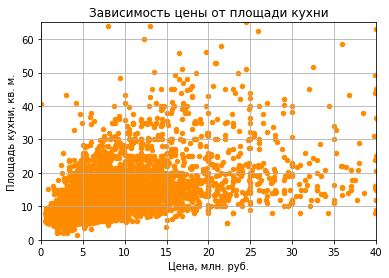

In [347]:
data.plot(x='last_price_m_rub', y='kitchen_area', kind='scatter', ylim=(0, 65), xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Площадь кухни, кв. м.')
plt.title('Зависимость цены от площади кухни');

Несмотря на то, что здесь тоже очевидна взаимосвязь, можно смело утверждать, что размер кухни влияет на стоимость квартиры в чуть меньшей степени, чем жилая и общая площадь

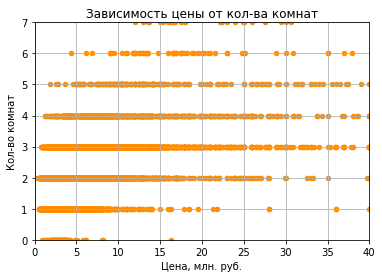

In [348]:
data.plot(x='last_price_m_rub', y='rooms', kind='scatter', ylim=(0, 7), xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Кол-во комнат')
plt.title('Зависимость цены от кол-ва комнат');

Тут всё очевидно, студии - самые дешевые, многокомнатные квартиры - самые дорогие. Не вижу ничего неожиданого на этом графике

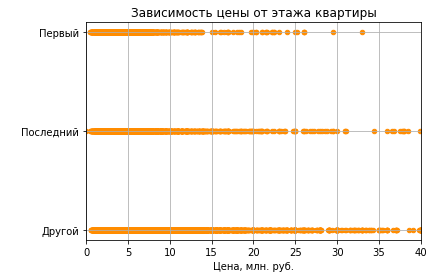

In [352]:
data.plot(x='last_price_m_rub', y='floor_type', kind='scatter', xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel(' ')
plt.title('Зависимость цены от этажа квартиры');

А вот и ещё одно подтверждение того, что первый этаж - самый непопулярный. Да, разница между последним и всеми остальными этажами тоже есть, но не такая драматичная, как между первым и всеми остальными

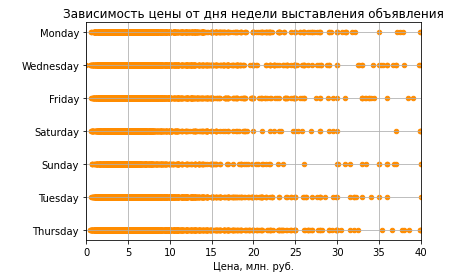

In [353]:
data.plot(x='last_price_m_rub', y='day_of_the_week_exp', kind='scatter', xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel(' ')
plt.title('Зависимость цены от дня недели выставления объявления');

Этот график хорошо соответствует гистограмме, которую мы построили ранее. Объявления о продаже дешевле в выходные. Мне всё ещё не хватает знаний в тонкостях этой индустрии, чтобы понять, почему так, но факт очевиден. Выходные дни - самые непопулярные для выставления объявлений о продаже

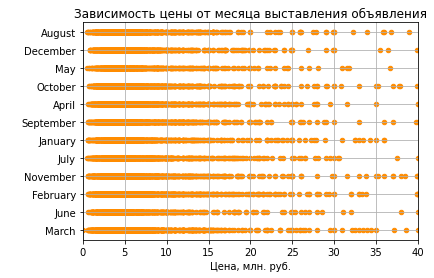

In [354]:
data.plot(x='last_price_m_rub', y='month_exp', kind='scatter', xlim=(0, 40), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel(' ')
plt.title('Зависимость цены от месяца выставления объявления');

И снова не вижу каких-то чётких закономерностей касаемо месяца выставления на продажу объявлений. Постепенно убеждаюсь в том, что месяц года (или, по крайней мере, сезон) никак не влияет на стоимость квартиры

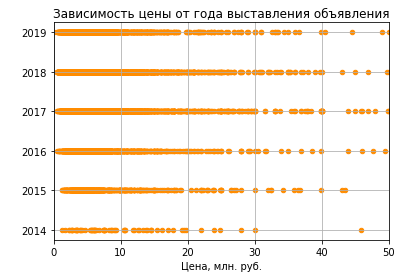

In [355]:
data.plot(x='last_price_m_rub', y='year_exp', kind='scatter', xlim=(0, 50), grid=True, color='darkorange')
plt.xlabel('Цена, млн. руб.')
plt.ylabel(' ')
plt.title('Зависимость цены от года выставления объявления');

Ну а здесь всё ясно как день. Годы идут - цены растут. Ничего другого здесь увидеть не ожидал. Однако, всё же немного удивляет небольшой спад цен в 2019 году

In [356]:
# Теперь построим корреляцию Пирсона матрицей для тех параметров, для которых это возможно

data[['last_price_m_rub', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'city_center_dist']].corr()

,last_price_m_rub,total_area,living_area,kitchen_area,rooms,city_center_dist
last_price_m_rub,1.000000,0.652706,0.542493,0.511614,0.382872,-0.261415
total_area,0.652706,1.000000,0.922781,0.578826,0.792381,-0.252361
living_area,0.542493,0.922781,1.000000,0.357779,0.872254,-0.235108
kitchen_area,0.511614,0.578826,0.357779,1.000000,0.230023,-0.193993
rooms,0.382872,0.792381,0.872254,0.230023,1.000000,-0.179701
city_center_dist,-0.261415,-0.252361,-0.235108,-0.193993,-0.179701,1.000000


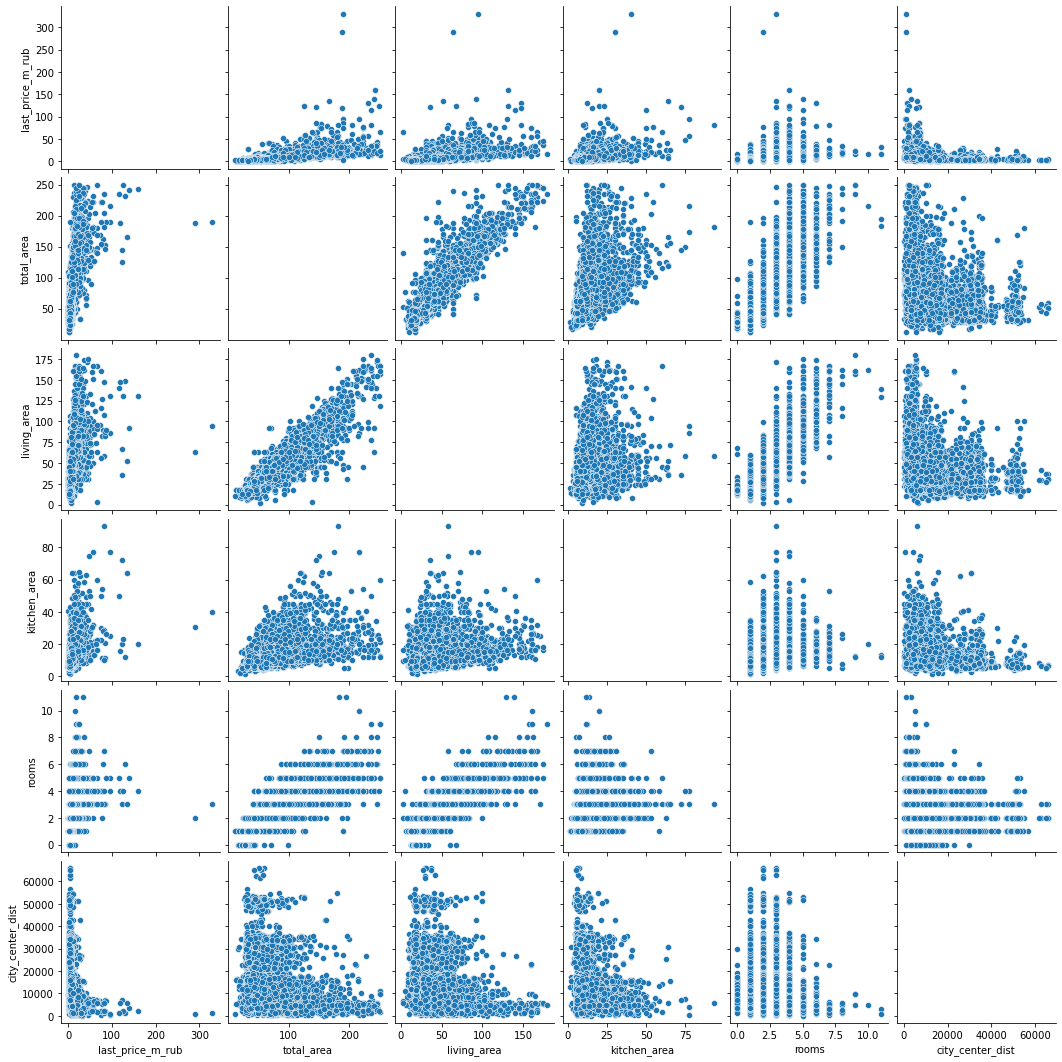

In [372]:
data_corr = data[['last_price_m_rub', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'city_center_dist']].copy()
sns.pairplot(data_corr, diag_kind=False);

Из построенной матрицы видно, что сильнее всего на стоимость влияет общая площаль. Жилая площадь и площадь кухни замыкают тройку самых весомых переменных в рассчете цены на недвижимость.
Количество комнат тоже влияет значительно, а вот удаленность от центра - гораздо слабее, чем я ожидал. Если подумать - оно и логично, ведь на окраинах города тоже есть элитные жилые кварталы (убедимся в этом чуть ниже)

#### Выводы:

- Сильнее всего на стоимость квартиры влияют её площадь, количество комнат, этаж
- Также важным является день недели, в который выставлено объявление. Я понял одно наверняка: не занимайтесь продажей квартир в выходные. Видимо, это плохо со всех точек зрения :)
- Месяц или сезонность никак не влияют на цену квартиры в объявлении

Далее, в соответствии с заданием:
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [221]:
# Для начала выделим 10 населенных пунктов с наибольшим количеством объявлений
# Для этого создадим сводную таблицу

data.pivot_table(index='locality_name', values='last_price_m_rub', aggfunc='count').sort_values(by='last_price_m_rub', ascending=False).head(10)

,last_price_m_rub
locality_name,
Санкт-Петербург,9964
Всеволожск,271
Пушкин,231
поселок Шушары,216
поселок Мурино,212
Колпино,202
Гатчина,148
Петергоф,145
поселок Парголово,136


In [222]:
# Далее на основе сводной таблицы найдём населенные пункты с самым дорогим и самым дешевым квадратным метром

data.query('locality_name == "Санкт-Петербург" |locality_name == "Всеволожск" |locality_name == "Пушкин" | locality_name == "поселок Шушары" | locality_name == "поселок Мурино" | locality_name == "Колпино" | locality_name == "Гатчина" | locality_name == "Петергоф" | locality_name == "поселок Парголово" | locality_name == "Сестрорецк"').pivot_table(index='locality_name', values='price_per_m2', aggfunc='mean').sort_values(by='price_per_m2', ascending=False).round(2)

,price_per_m2
locality_name,
Санкт-Петербург,115049.74
Пушкин,103965.68
Сестрорецк,102267.33
поселок Парголово,90977.42
поселок Мурино,87085.57
Петергоф,85554.14
поселок Шушары,79286.49
Колпино,75973.42
Гатчина,70024.96


Итак, самое дорогое жильё, ка несложно было догадаться, в Санкт-Петербурге. Замыкает топ Всеволожск, там недвижимость самая дешевая

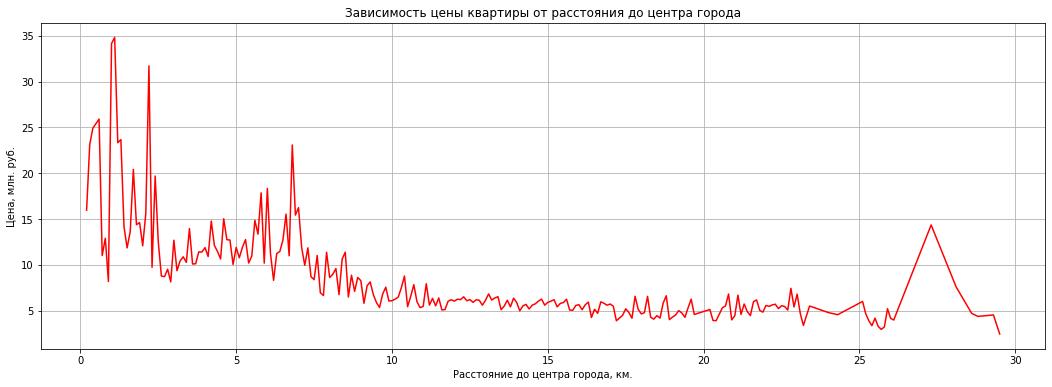

In [376]:
city_center_dist_price = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_center_dist_km').agg({'last_price_m_rub': 'mean'})
city_center_dist_price.plot(legend=False, figsize=(18, 6), grid=True, color='red')
plt.xlabel('Расстояние до центра города, км.')
plt.ylabel('Цена, млн. руб.')
plt.title('Зависимость цены квартиры от расстояния до центра города');

В общем и целом, стоимость ожидаемо падает тем сильнее, чем больше расстояние до центра. За одним большим НО - между 25 и 30 км от центра происходит сильный рост цены. Я не смог найти, где я мог так сильно ошибиться в расчетах, чтобы так получилось. Единственое объяснение, которое приходит в голову - на этом расстоянии находится какой-то элитный жилой район, цены на жильё в котором сильно выше средних

### Общий вывод

Итак, мы провели полноценный анализ объявлений о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах. Мы изучили ключевые параметры объектов, выявили уровень корреляции между этими параметрами и стоимостью объекта.

На основе проведенного исследования можно сделать следующие выводы:

- На стоимость квартиры больше всего влияют ее площадь и количество комнат. Сезонность на стоимость не влияет или влияет минимально;
- Квартиры на первом этаже - самые дешевые. Далее идут квартиры на последнем этаже, и все остальные;
- Самые дорогие квартиры в Санкт-Петербурге, больше всего объявлений также в Питере;
- Чем больше расстояние до центра, тем меньше стоимость;
- Большинство квартир продаётся в пределах трёх месяцев. Квартиры, проданные в этот срок, можно считать проданными быстро. С другой стороны, квартиры, проданные в течение полутора лет, также входят в рамки нормы по срокам. Квартиры, вышедшие за этот срок, можно считать медленно продающимися.

